---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

Predict name of the fruit using its physical characteristics.

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruits/fruit_data_with_colors.txt') #?

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

/Users/lukasz.knade/anaconda3/envs/html/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


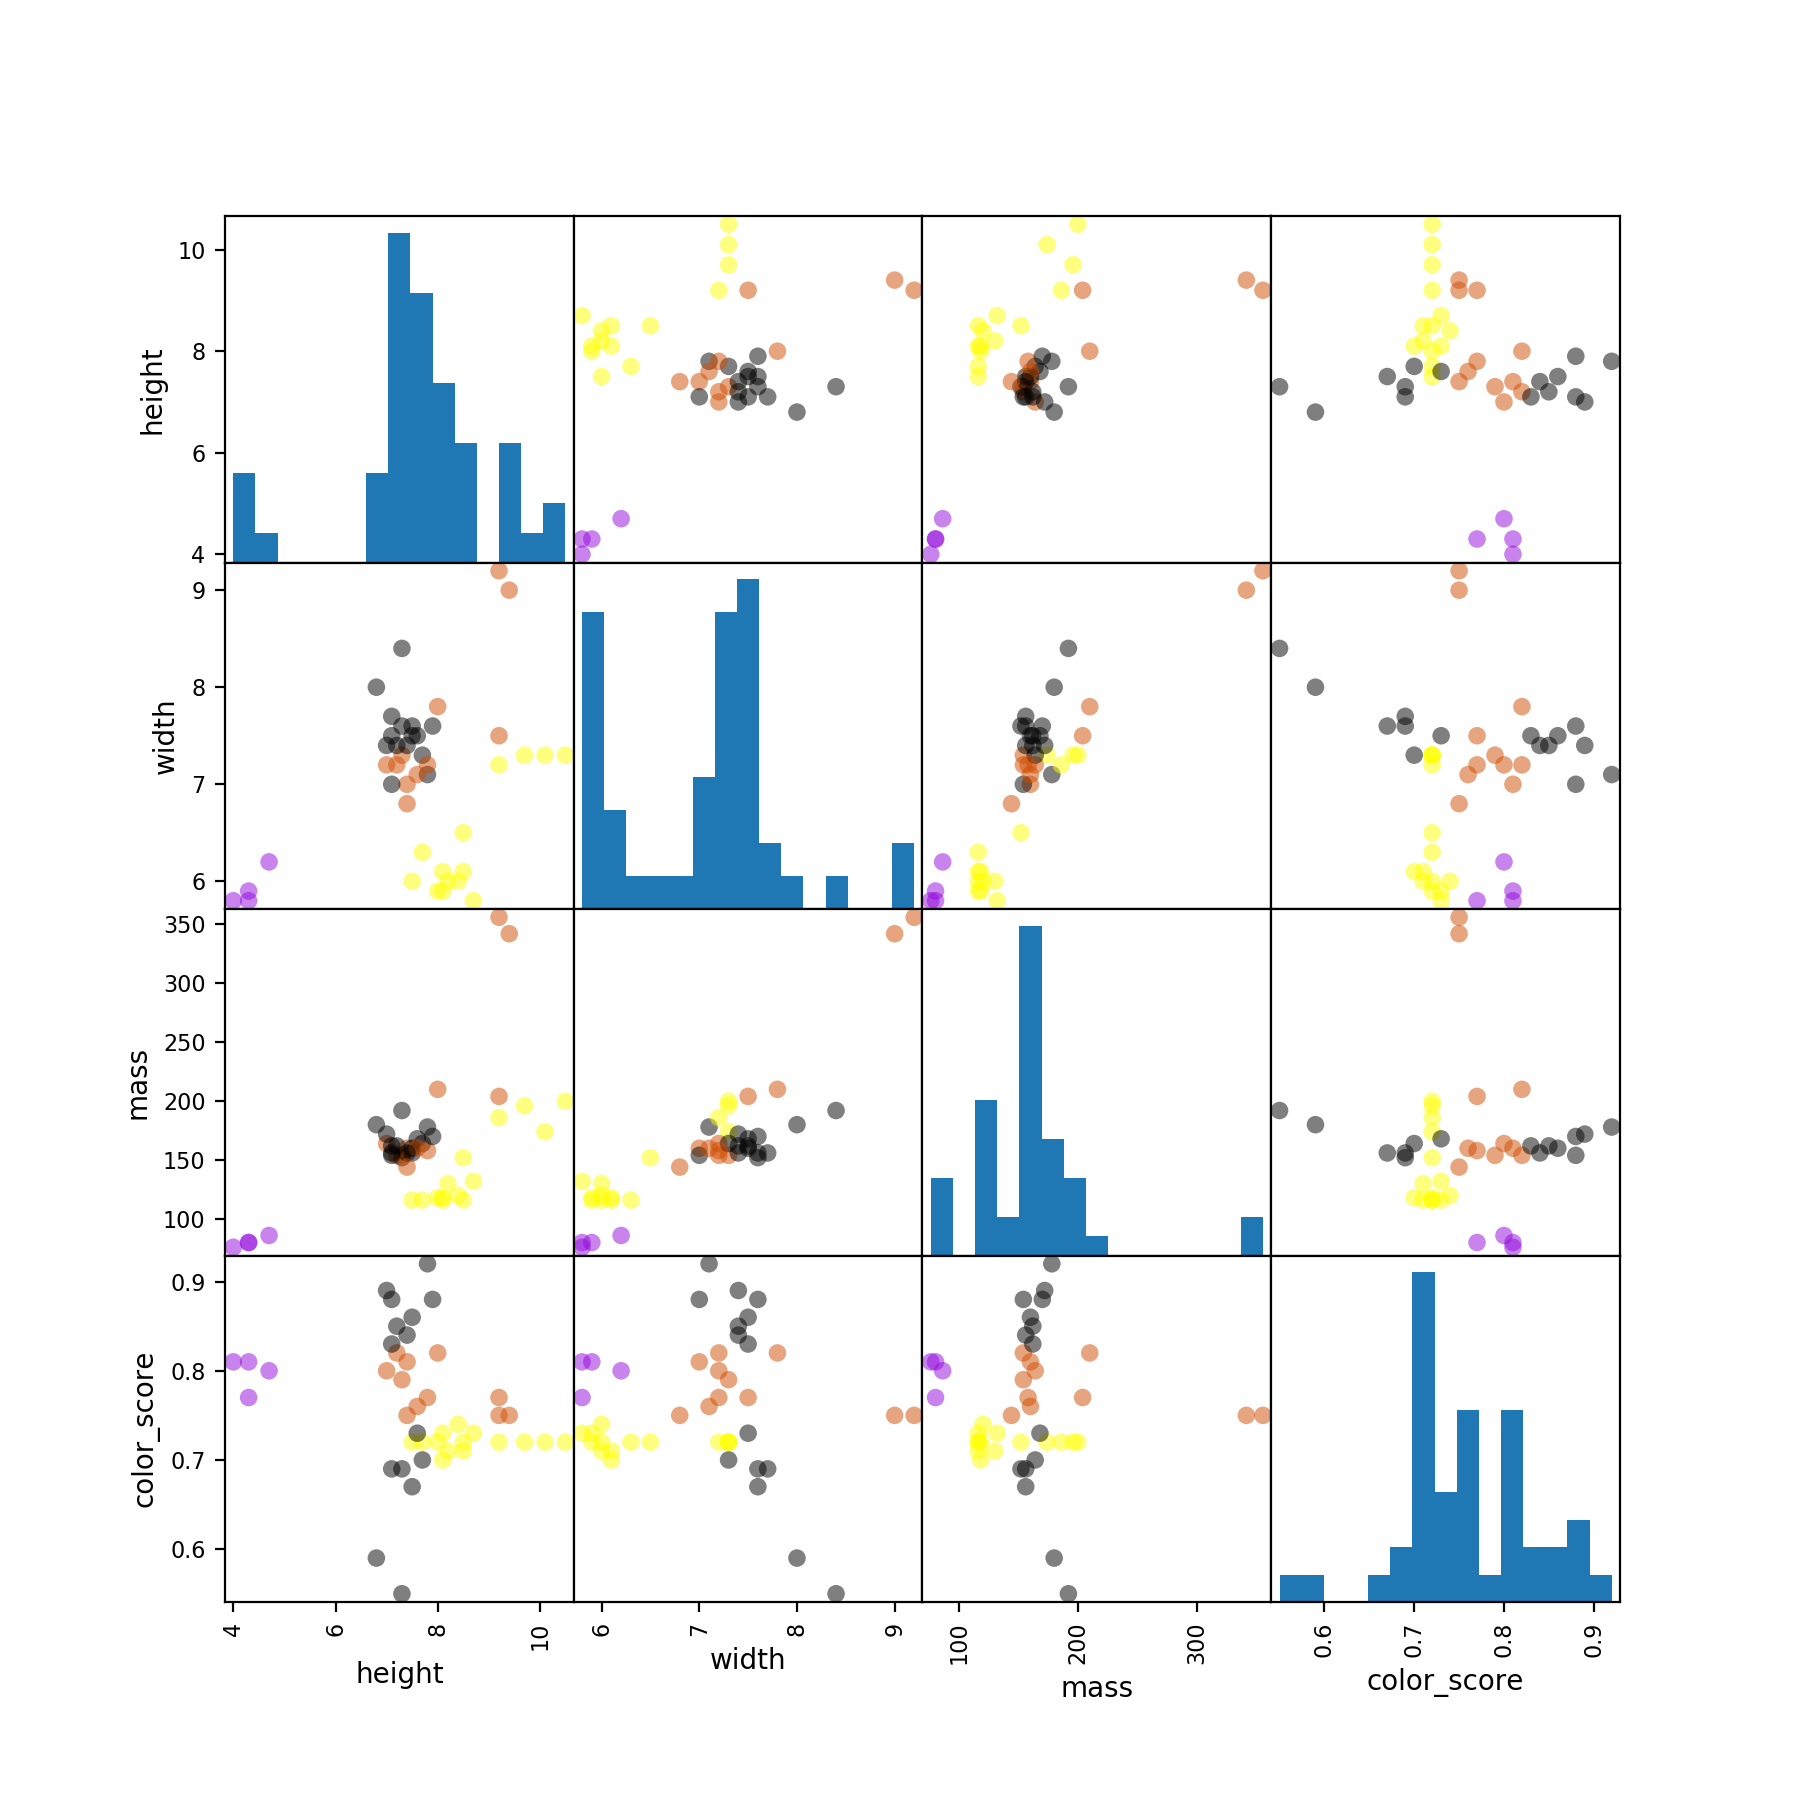

In [4]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, 
                            c= y_train, 
                            marker = 'o', 
                            s=40, 
                            hist_kwds={'bins':15}, 
                            figsize=(9,9), 
                            cmap=cmap)

<IPython.core.display.Javascript object>


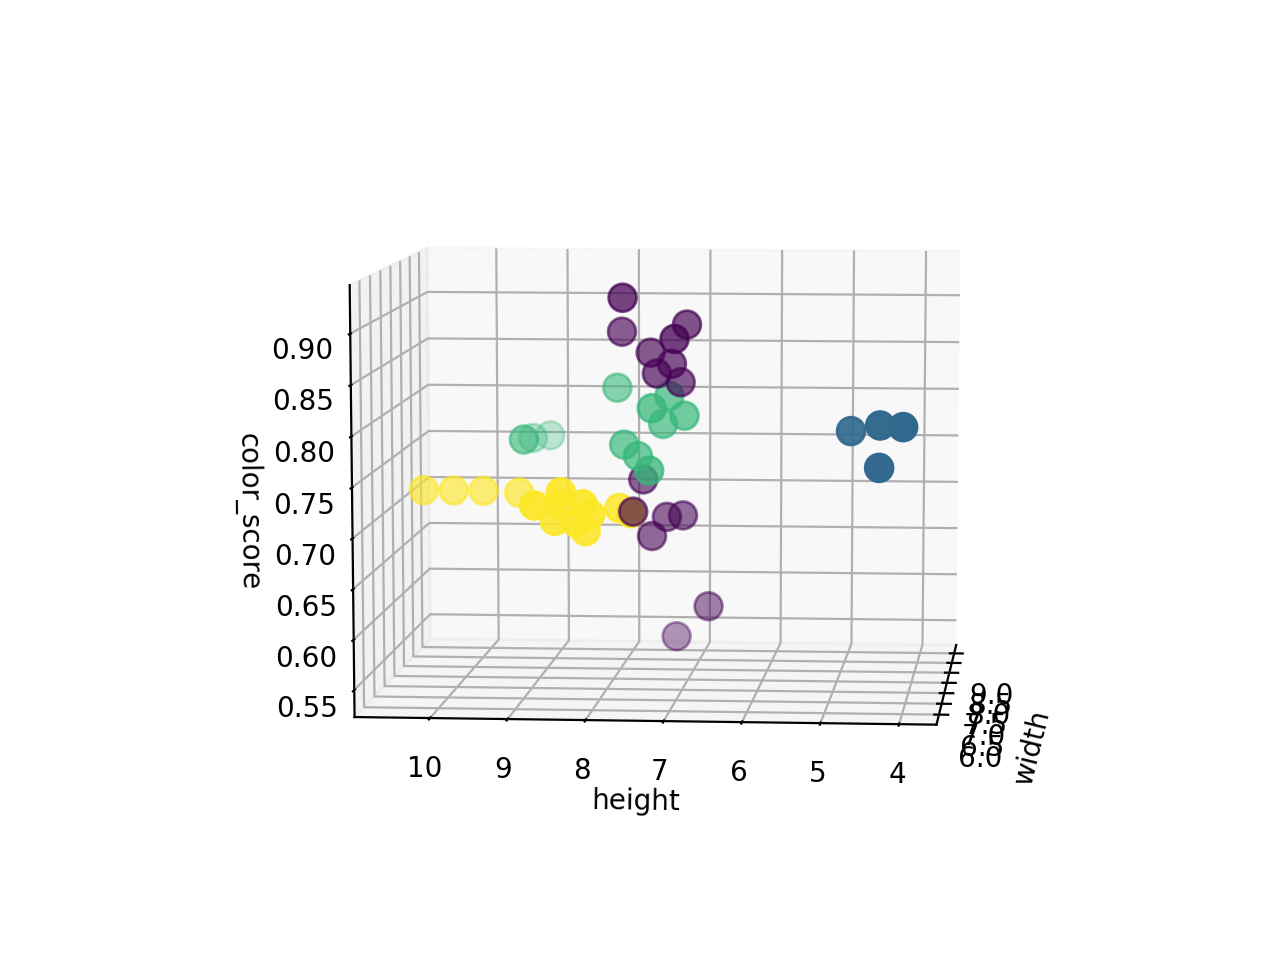

In [5]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [6]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

Overfitting vs underfitting

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [12]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [13]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


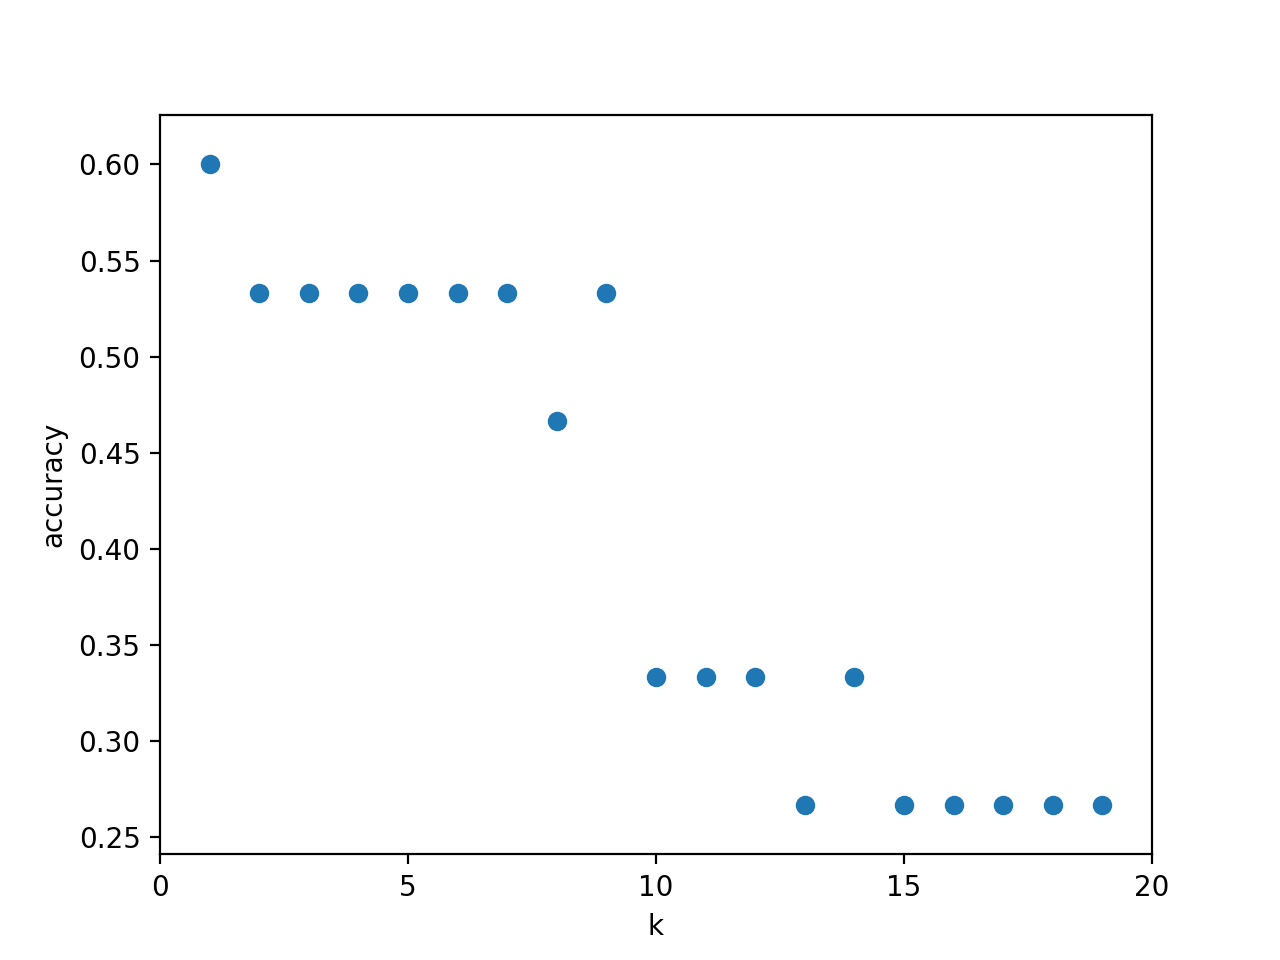

In [14]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


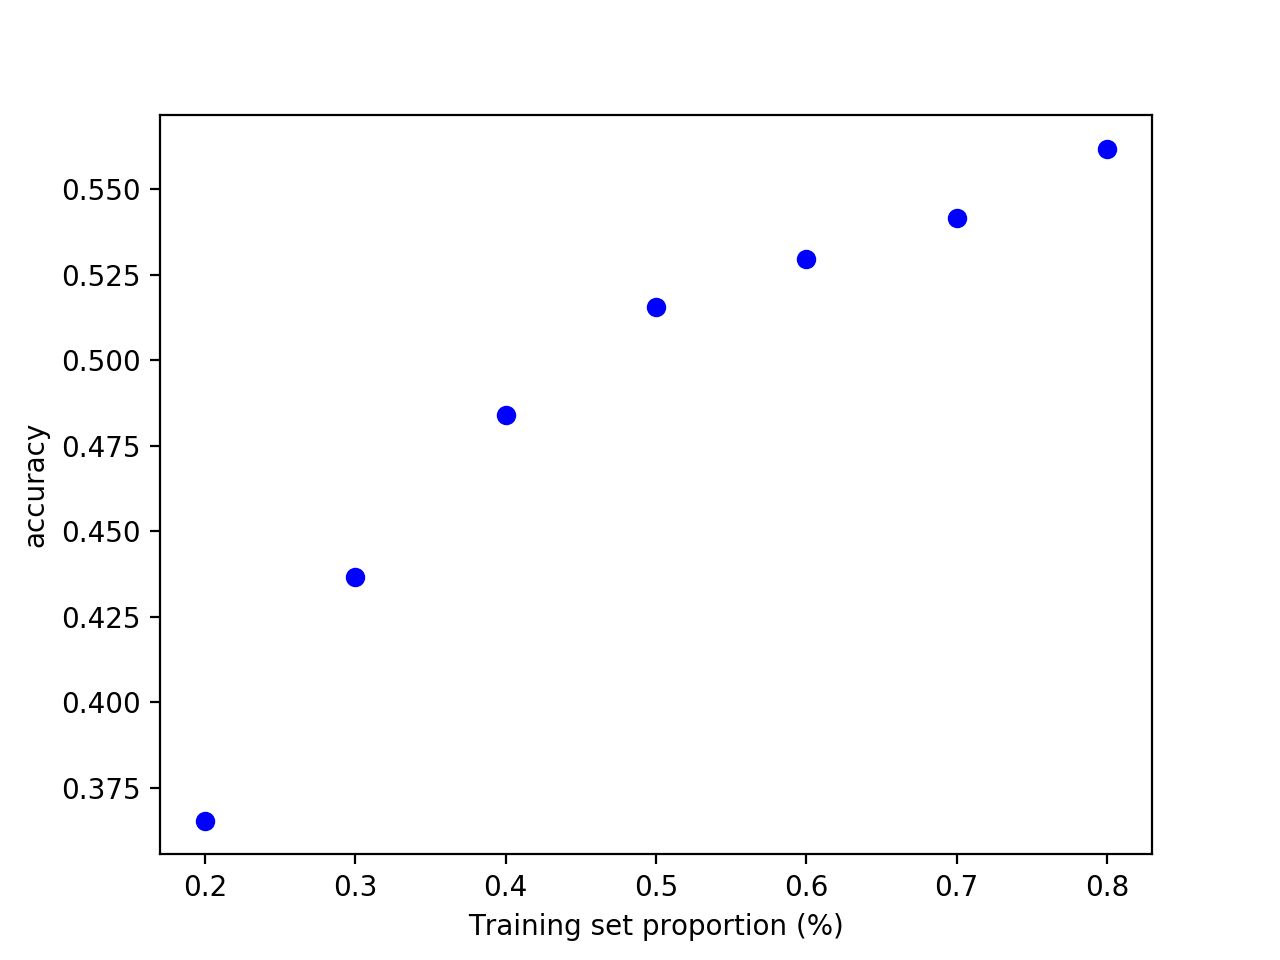

In [15]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### Pytanie bonus

Jakie wyniki dostaniemy z ewaluacji zbioru trenującego przy ilości sąsiadów 1?

Odpowiada to dobrze na pytanie, dlaczego potrzebujemy rozdzielenia na zbiór trenujący i testowy :)

## Charakterystyka knn


### Knn może działać na jakichkolwiek danych
Mogą to byc dane ciągłe, dyskretne, a nawet jakościowe. Np. dla danych jakościowych możemy wybrać odległość (cechy się zgadzają=1, cechy się nie zgadzają=0). Jest to ogromna zaleta. Regresja np. nie może działać na danych jakościowych innych niż binarne.
W knn wszystko sprowadza się do wyboru metryki.

### Dobór metryki jest kluczowy
Tak jak ilość sąsiadów. O metrykach (także tych działających na zmiennych jakościowych), więcej tutaj:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

### Knn nie ma fazy trenowania
W zasadzie odległości liczymy już przy klasyfikacji, wcześniej model nie dobiera żadnych parametrów.

### Knn jest bardzo dokładny, ale często zbyt wolny
Knn daje zazwyczaj dobre wyniki, ale nie radzi sobie ze sporą ilością danych (przy 100 tys obserwacji ze zbioru trenującego, musimy znaleźć odległość do każdej z tych 100 tys obserwacji). Można stosować triki, które zmniejszają skalę problemu (podział na obszary), ale zawsze problem występuje, szczególnie w modelach produkcyjnych. Oczywiście nim więcej danych tym dokładniej działa knn (przy regresjii całe mnóstwo danych nie musi dawać istotnie lepszego wyniku niż np 100). Przy dobrym doborze k i metryki knn może działa czasami bardzo skutecznie, mimo wyjątkowej prostoty

### Knn jest bardzo łatwo zaimplementować 


### Knn nie ma wielu parametrów
W zasadzie to miara odległości oraz ilość sąsiadów. Znalezienie optymalnych parametrów jest często prostsze niż np. w sieciach neuronowych, gdzie parametrów jest często kilkadziesiąt i więcej.

### Knn jest wrażliwy na skalowanie
O tym w punkcie niżej :)

## Skalowanie danych

Wyobraźmy sobie następującą sytuację:

Chcemy dokonać klasyfikacji, czy wnioskodawca spłaci kredyt (etykieta). Dysponujemy danymi historycznymi, które obejmują:
    
* ile dana osoba zarabia w skali rocznej w złotówkach (zmienna x)
* ile dana osoba ma członków rodziny (zmienna y)
* czy ostatecznie dana osoba spłaciła kredyt

Bierzemy zwykłą odległość euklidesową jako metrykę. Ostatecznie okazuje się, że na działanie naszego algorytmu ilośc członków rodziny nie ma zupełnie znaczenia. Dlaczego tak się dzieje? Odległość euklidesowa:

![](fruits/edist.png)

zdominowana będzie całkowicie przez zarobki, ponieważ dla 
* osoby 1 z zarobkami 56800 i 10 członkami rodziny
* osoby 2 z zarobkami 56900 i 0 członkami rodziny

mamy pod pierwiastkiem:

$$(56800 - 56900 ) ^2 + (10 - 0 ) ^ 2 = 100^2 + 10 ^2 = 10000 + 10= 10010$$


Czyli ilość członków rodziny nie ma prawie wpływu na wynik, natomiast mała różnica w zarobkach (100zł) ma ogromny wpływ

Osoba 1 będzie bliżej osoby 2, niż takiej osoby:
* osoba 3 z zrobkami 56950 i 11 członkami rodziny

ponieważ:

$$(56800 - 56950 ) ^2 + (10 - 11 ) ^ 2 = 150^2 + 1 ^2 = 22500 + 1 = 22501$$

chociaż osoba 1 ma podobny profil  do osoby 3 (duża rodzina, zarobki różnią się jedynie 150 zł w skali roku), to według knn bliżej jej do osoby 2 (bo różnica zarobków wynosi 100, a nie 150 zł w skali roku)

### Co z tym zrobić? 
Najlepiej przeskalować dane, żeby wszystkie cechy przyjmowały wartości w tej samej skali, np 0-1. Niekoniecznie zawsze jest to potrzebne, gdyż czasami chcemy żeby jedna cecha była dominująca albo posługujemy się danymi w jednej skali (wszystkie wymiary w metrach).


W Pythonie łatwo przeskalować dane dzięki modułowi sklearn.preprocessing (jest wiele różnych skalerów).

Sytuację dobrze ilustruje:

![przed skalowaniem](fruits/knn-ns.png)

![po skalowaniu](fruits/knn-s.png)

### Co z resztą algorytmów?

Wszystko zależy od algorytmu. Knn jest niesamowicie wrażliwy na skalowanie (jak i dobór metryki). Regresja liniowa daje niezależny wynik od przeskalowania (rekompensuje skalowanie doborem parametrów) podobnie jak drzewa decyzyjne (które ustawiają sztywne progi w każdym węźle). Sieci neuronowe teoretycznie są zbieżne niezależnie od przeskalowania danych, ale na przeskalowanych danych zbiegają szybciej, zatem zdecydowanie warto je przeskalować.
